In [15]:
import pandas as pd
import re
from unidecode import unidecode
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm 
from matplotlib import pyplot as plt

import random

random.seed(47)

In [16]:
df_train = pd.read_csv("../train.csv", encoding="UTF8")

## Normalize 

In [17]:
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    text = unidecode(text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r'\d+', '', text)
    return text

In [18]:
df_train["text"] = df_train["text"].apply(normalize_text)

## Vetorizacao

In [19]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train["text"]).toarray()
# X_test = vectorizer.fit_transform(df_test["text"])
y = df_train["target"].to_numpy()

## K-Fold

In [20]:
from sklearn.model_selection import KFold

metrics_list = list()

for j in range(2,20):

    kf = KFold(n_splits=j)
    n = kf.get_n_splits(X)
    
    accuracy = 0
    precision = 0
    recall = 0
    f1 = 0
    
    print(f"Numero de etapas: {n}")
    for i, (train_index, test_index) in tqdm(enumerate(kf.split(X))):
        nb = GaussianNB()
        nb.fit(X[train_index], y[train_index])
        accuracy += accuracy_score(y[test_index], nb.predict(X[test_index]))
        precision += precision_score(y[test_index], nb.predict(X[test_index]))
        recall += recall_score(y[test_index], nb.predict(X[test_index]))
        f1 += f1_score(y[test_index], nb.predict(X[test_index]))
    
    metrics = {
        "accuracy": round(accuracy/n, 4),
        "precision": round(precision/n, 4),
        "recall": round(recall/n, 4), 
        "f1": round(f1/n, 4)
    }
    
    metrics_list.append((metrics, j))

Numero de etapas: 2


2it [00:13,  6.95s/it]


Numero de etapas: 3


3it [00:16,  5.47s/it]


Numero de etapas: 4


4it [00:18,  4.52s/it]


Numero de etapas: 5


5it [00:20,  4.14s/it]


Numero de etapas: 6


6it [00:22,  3.80s/it]


Numero de etapas: 7


7it [00:25,  3.58s/it]


Numero de etapas: 8


8it [00:27,  3.40s/it]


Numero de etapas: 9


9it [00:28,  3.20s/it]


Numero de etapas: 10


10it [00:31,  3.14s/it]


Numero de etapas: 11


11it [00:33,  3.03s/it]


Numero de etapas: 12


12it [00:36,  3.03s/it]


Numero de etapas: 13


13it [00:38,  2.95s/it]


Numero de etapas: 14


14it [00:40,  2.89s/it]


Numero de etapas: 15


15it [00:42,  2.86s/it]


Numero de etapas: 16


16it [00:45,  2.83s/it]


Numero de etapas: 17


17it [00:48,  2.83s/it]


Numero de etapas: 18


18it [00:49,  2.75s/it]


Numero de etapas: 19


19it [00:51,  2.72s/it]


In [21]:
metrics_true = [i[0] for i in metrics_list]
ks = [i[1] for i in metrics_list]

In [22]:
accuracies = [i["accuracy"] for i in metrics_true]
recalls = [i["recall"] for i in metrics_true]
f1s = [i["f1"] for i in metrics_true]
precisions = [i["precision"] for i in metrics_true]

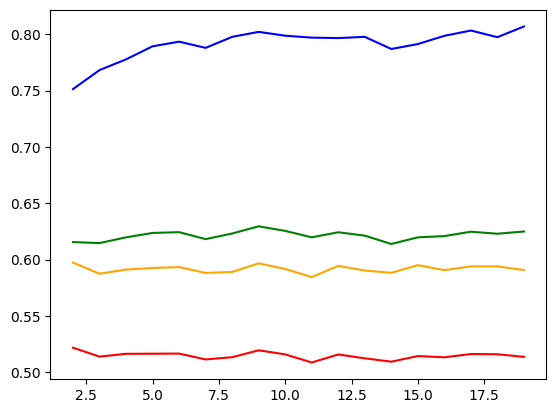

In [25]:
plt.plot(ks, accuracies, label = "accuracy", color="orange")
plt.plot(ks, recalls, label = "recall", color="blue")
plt.plot(ks, f1s, label = "f1", color="green")
plt.plot(ks, precisions, label = "precision", color="red")
plt.show()